<font color='blue'> **28. SUB - Groundwater Pumpage in the Antelope Valley in southern California.** </font> 

In [1]:
import os ; from pathlib import Path  ; import flopy ; import matplotlib.pyplot as plt ; import numpy as np ; from flopy.plot.styles import styles   
from modflow_devtools.misc import get_env ; write = get_env("WRITE", True) ; run = get_env("RUN", True) ; import pandas as pd ; import datetime
sim_name = "ex-gwf-csub-p03" ; workspace = Path("./28")      ; workspace.mkdir(exist_ok=True)    ; exe_name = 'E:\\15_REPOS\\00_BETAMI\\bin\\mf6.exe'  
from modflow_devtools.latex import build_table, exp_format, float_format, int_format   ; import pickle  ; import csv
import matplotlib as mpl

path  = 'E:\\15_REPOS\\00_BETAMI\\bin\\data_modflow6-examples\\ex-gwf-csub-p03'  ; ref_data = Path(path)
fname = "boundary_heads.csv" ; fpath_CSV = os.path.join(path,fname) ; csv_head = np.genfromtxt(fpath_CSV, names=True, delimiter=",")         ; chd_ts = []
for idx in range(csv_head.shape[0]):    chd_ts.append((csv_head["time"][idx],csv_head["CHD_L01"][idx],csv_head["CHD_L06"][idx],csv_head["CHD_L13"][idx]))
pdd=pd.DataFrame(chd_ts)  ; pdd.to_csv (workspace / '00_boundary_heads_CHD.csv')

In [2]:
# np.savetxt(ref_data/"01.csv",botm,delimiter=",")       #; np.savetxt(ref_data/"11.csv",ib_name,fmt="%s",delimiter=",")  # Dumping structure 
# with open(ref_data/ "01_parameters", 'wb') as handle: pickle.dump(parameters, handle, protocol=pickle.HIGHEST_PROTOCOL) # Dumping parameters 
with open(ref_data/ "01_parameters",'rb') as handle: parameters = pickle.load(handle)  
keys,values=zip(*parameters.items());print(parameters); print(keys) ;dictList=values[0].items();print(dictList) ;dictList=values[1].items();print(dictList)

{'ex-gwf-csub-p03a': {'head_based': True, 'cg_ske': (0.0, 0.0, 0.0, 0.0, 5.42e-06, 0.0, 5.42e-06, 0.0, 0.0, 0.0, 0.0, 5.42e-06, 0.0, 5.42e-06), 'pcs0': (-4.91, -5.33, -5.76, -6.1, -6.1, -6.1, -6.1, -6.1, -6.71, -6.71, -6.1, -6.1, -6.71), 'ssv': (0.00066955, 0.00066955, 0.00066955, 0.00012753, 0.00012753, 0.0012116, 0.0012116, 0.0012116, 0.00012753, 0.00012753, 0.00047825, 0.00047825, 0.00047825), 'sse': (5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06, 5.4202e-06)}, 'ex-gwf-csub-p03b': {'head_based': False, 'cg_ske': (0.0, 0.0, 0.0, 0.0, 6.88e-06, 0.0, 6.88e-06, 0.0, 0.0, 0.0, 0.0, 6.88e-06, 0.0, 6.88e-06), 'pcs0': (47.27, 55.93, 62.76, 75.9, 98.15, 103.33, 111.86, 117.35, 285.6, 339.25, 75.9, 285.6, 339.25), 'ssv': (0.0013542, 0.0013542, 0.0013542, 0.00026912, 0.00027107, 0.0019249, 0.0019249, 0.0019249, 0.00014632, 0.00021655, 0.00022717, 0.00048671, 0.001017), 'sse': (8.5697e-06, 8.5697e-0

In [3]:
a1  = pd.read_csv(ref_data / '01.csv', names=['botm'])            ; a2  = pd.read_csv(ref_data / '02.csv', names=['strt']) 
a3  = pd.read_csv(ref_data / '03.csv', names=['k33'])             ; a4  = pd.read_csv(ref_data / '04.csv', names=['iconvert']) 
a5  = pd.read_csv(ref_data / '05.csv', names=['idz','idx','idy']) ; a7  = pd.read_csv(ref_data / '07.csv', names=['ib_thickness']) 
a8  = pd.read_csv(ref_data / '08.csv', names=['ib_rnb'])          ; a9  = pd.read_csv(ref_data / '09.csv', names=['ib_kv']) 
a10 = pd.read_csv(ref_data / '10.csv', names=['ib_head'])         ; a11 = pd.read_csv(ref_data / '11.csv', names=['ib_name']) 
a6  = pd.read_csv(ref_data / '06.csv', names=['ib_ctype']) ; df = pd.concat([a1[:],a2[:],a3[:],a4[:],a5[:],a6[:],a7[:],a8[:],a9[:],a10[:],a11[:]],axis=1)    
df.to_csv (workspace / '01_stucture.csv')   ; df_str = df.to_string()     ;df.head(2)

,botm,strt,k33,iconvert,idz,idx,idy,ib_ctype,ib_thickness,ib_rnb,ib_kv,ib_head,ib_name
0,-36.8811,0.00,0.009140,1.0,1.0,0.0,0.0,CUNIT,5.48649,1.0,999.0,999.0,CUNIT
1,-42.3676,1.57,0.000004,0.0,2.0,0.0,0.0,CUNIT,8.22969,1.0,999.0,999.0,CUNIT


In [4]:
# .. to be removed .. info to be extracted strait from the above delivered table columns ..  botm, srtr, k33
botm = (
    -36.8811,
    -42.3676,
    -50.5973,
    -56.9981,
    -69.7998,
    -70.1046,
    -92.0504,
    -97.2321,
    -105.7666,
    -111.2530,
    -111.5578,
    -278.8945,
    -279.1993,
    -332.5398,
)
strt = (
    0.00,
    1.57,
    3.38,
    5.56,
    6.77,
    6.77,
    6.77,
    6.77,
    6.77,
    6.77,
    6.77,
    6.77,
    5.55,
    5.55,
)
icelltype = 0
k33 = (
    9.14e-3,
    3.66e-6,
    3.66e-6,
    3.66e-6,
    9.14e-3,
    9.14e-3,
    9.14e-3,
    4.57e-6,
    4.57e-6,
    4.57e-6,
    9.14e-3,
    9.14e-3,
    9.14e-3,
    9.14e-3,
)
iconvert = (1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
sgm = 1.7
sgs = 2.0
cg_theta = 0.3
ib_cellid = (
    (1, 0, 0),
    (2, 0, 0),
    (3, 0, 0),
    (4, 0, 0),
    (6, 0, 0),
    (7, 0, 0),
    (8, 0, 0),
    (9, 0, 0),
    (11, 0, 0),
    (13, 0, 0),
    (4, 0, 0),
    (11, 0, 0),
    (13, 0, 0),
)
ib_ctype = (
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "nodelay",
    "delay",
    "delay",
    "delay",
)
ib_thickness = (
    5.48649,
    8.22969,
    6.4008,
    2.7432,
    0.6096,
    5.1817,
    8.53449,
    5.4864,
    7.6201,
    0.9144,
    2.7432,
    3.0480,
    2.7432,
)
ib_rnb = (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.92, 1.66, 2.85)
ib_theta = 0.30
ib_kv = (
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    4.57e-6,
    4.57e-6,
    4.57e-6,
)
ib_head = (
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    999.0,
    6.77,
    6.77,
    5.55,
)
ib_name = (
    "CUNIT",
    "CUNIT",
    "CUNIT",
    "NODELAY",
    "NODELAY",
    "AQUITARD",
    "AQUITARD",
    "AQUITARD",
    "NODELAY",
    "NODELAY",
    "DELAY",
    "DELAY",
    "DELAY",
)

In [5]:
length_units = "meters" ;time_units = "days"         ; ib_theta = 0.3 ;icelltype = 0 ;sgm = 1.7 ;sgs = 2 ;cg_theta = 0.3 ;nper = 353 ;nlay = 14 ;ncol = 1
nrow = 1 ;delr = 1 ;delc = 1 ;top = 0 ;nouter = 200  ; ninner = 100 ;hclose = 0.000001 ;rclose = 0.001 ;linaccel = "cg" ;relax = 0.97 
dstart = datetime.datetime(1907, 1, 1, 0, 0, 0)      ; date_list = [dstart + datetime.timedelta(days=x) for x in csv_head["time"]] ; tdis_ds = []
for idx in range(82):         tdis_ds.append((365.25, 12, 1.0))
for idx in range(82, nper):   tdis_ds.append((22.0, 22, 1.0))                 ; c6 = []
for k, tag in zip((0, 5, 10, 12), ("upper", "middle", "middle", "lower")):      c6.append([k, 0, 0, tag])

In [6]:
def build_models(name,subdir_name="."  ,head_based=True  ,cg_ske=1e-3  ,pcs0=0.0  ,ssv=1e-1  ,sse=1e-3,):
    opth = f"{name}.gwf.obs"  ; cpth = opth + ".csv" ;     obs_array = []
    for k in range(nlay): obs_array.append([f"HD{k + 1:02d}", "HEAD", (k, 0, 0)])     # gwf obs
    if head_based:  hb_bool = True ; tsgm = None ; tsgs = None
    else:           hb_bool = None ; tsgm = sgm  ; tsgs = sgs
    sub6 = []
    for idx, cdelay in enumerate(ib_ctype):
        sub6.append([idx,ib_cellid[idx],cdelay,pcs0[idx],ib_thickness[idx],ib_rnb[idx],ssv[idx],sse[idx],ib_theta,ib_kv[idx],ib_head[idx],ib_name[idx],])
    obs = [("cunit1", "interbed-compaction", (0,)),("cunit2", "interbed-compaction", (1,)),("cunit3", "interbed-compaction", (2,)),
           ("aquitard6", "interbed-compaction", (5,)),("aquitard7", "interbed-compaction", (6,)),("aquitard8", "interbed-compaction", (7,)),
           ("nodelay4", "interbed-compaction", (3,)),("nodelay5", "interbed-compaction", (4,)),("nodelay9", "interbed-compaction", (8,)),
           ("nodelay10", "interbed-compaction", (9,)),("delay11", "interbed-compaction", (10,)),("delay12", "interbed-compaction", (11,)),
           ("delay13", "interbed-compaction", (12,)),("es14", "estress-cell", (nlay - 1, 0, 0)),]
    for k in (1, 2, 3, 4, 6, 7, 8, 9, 11, 13):
        tag=f"tc{k + 1:02d}"  ;obs.append((tag,"compaction-cell",(k, 0, 0)))         ;tag=f"skc{k + 1:02d}"   ;obs.append((tag,"coarse-compaction",(k,0,0)))
    opth = f"{name}.csub.obs" ;csub_csv = opth + ".csv"; orecarray = {csub_csv: obs} ;csubnam = f"{sim_name}.head.ts"

    sim_ws = os.path.join(workspace, name)
    if subdir_name is not None:
        sim_ws = os.path.join(sim_ws, subdir_name)
    sim = flopy.mf6.MFSimulation(sim_name=name, sim_ws=sim_ws, exe_name="mf6")
    flopy.mf6.ModflowTdis(sim, nper=nper, perioddata=tdis_ds, time_units=time_units)
    flopy.mf6.ModflowIms(sim,print_option="summary",outer_maximum=nouter,outer_dvclose=hclose,linear_acceleration=linaccel,inner_maximum=ninner,
                         inner_dvclose=hclose,relaxation_factor=relax,rcloserecord=f"{rclose} strict",)
    gwf = flopy.mf6.ModflowGwf(sim,modelname=name,save_flows=True,)
    flopy.mf6.ModflowGwfdis(gwf,length_units=length_units,nlay=nlay,nrow=nrow,ncol=ncol,delr=delr,delc=delc,top=top,botm=botm,)
    flopy.mf6.ModflowUtlobs(gwf,digits=10,print_input=True,filename=opth,continuous={cpth: obs_array},)
    flopy.mf6.ModflowGwfic(gwf, strt=strt)
    flopy.mf6.ModflowGwfnpf(gwf,icelltype=icelltype,k=k33,k33=k33,save_specific_discharge=True,)
    flopy.mf6.ModflowGwfsto(gwf, iconvert=iconvert, ss=0.0, sy=0, transient={0: True})
    csub = flopy.mf6.ModflowGwfcsub(gwf,print_input=True,save_flows=True,head_based=hb_bool,specified_initial_interbed_state=True,
                                    update_material_properties=True,ndelaycells=39,boundnames=True,beta=4.65120000e-10,gammaw=9806.65,
                                    ninterbeds=len(sub6),sgm=tsgm,sgs=tsgs,cg_theta=cg_theta,cg_ske_cr=cg_ske,packagedata=sub6,)
    csub.obs.initialize(filename=opth, digits=10, print_input=True, continuous=orecarray)
    chd = flopy.mf6.ModflowGwfchd(gwf, stress_period_data={0: c6})
    chd.ts.initialize(filename=csubnam,timeseries=chd_ts,time_series_namerecord=["upper", "middle", "lower"],
                      interpolation_methodrecord=["linear", "linear", "linear"],sfacrecord=["1.0", "1.0", "1.0"],)
    flopy.mf6.ModflowGwfoc(gwf, printrecord=[("BUDGET", "ALL")])
    return sim
def write_models(sim, silent=True):  sim.write_simulation(silent=silent)
def run_models(sim, silent=True):    sim.run_simulation(silent=silent)  
def scenario(idx, silent=True):
    key = list(parameters.keys())[idx] ;     params = parameters[key].copy() ;     sim = build_models(key, **params)
    if write:       write_models(sim, silent=silent)
    if run:         run_models(sim, silent=silent)
scenario(0) #; scenario(1)  # Run the head based solution.  / Run the effective stress solution.

<font color='blue'> **00_Structure** </font> 

In [7]:
name='ex-gwf-csub-p03a'  ;sim=flopy.mf6.MFSimulation.load(sim_name=name ,sim_ws=Path(workspace,name) ,verbosity_level=0)  ;gwf=sim.get_model(name)

def constant_heads(ax, ann=False):
    for k in [0, 5, 10, 12]:
        ax.fill_between((0, 1),edges[k],y2=edges[k + 1],color='cyan',lw=6,label='s''',zorder=1,)
        
zelevs=[top]  ;edges=[(0, 0)] 
for z in botm: zelevs.append(z)                   ;edges.append((-z, -z))    ; np.savetxt(workspace/"02_edges.csv", edges, delimiter=",")
midzz=825.0/3.8081     ;midz=[edges[4],edges[7],edges[10],(midzz, midzz)]    ; nodelay=(1,2,3,6,7,8,9)  ;comb=[4,11,13] ;chds = (5,10,12) 

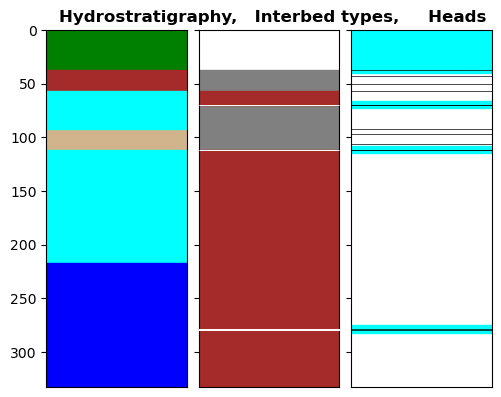

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(5, 4))                             ; plt.subplots_adjust(wspace=1)  
for idx, ax in enumerate(axes):     ax.set_xlim((0, 1)) ; ax.set_ylim(edges[-1][0], 0)
for edge in edges:     ax.plot((0, 1), edge, lw=0.5, color="black")          
ax = axes[0]
ax.fill_between((0, 1), edges[0], y2=edges[1], color="green", label="Upper aquifer") ; 
for k in (1, 2, 3): ax.fill_between((0, 1), edges[k], y2=edges[k + 1], color="brown", label='a1')
for k in (7, 8, 9): ax.fill_between((0, 1), edges[k], y2=edges[k + 1], color="tan", label='a2')
ax.fill_between((0, 1), midz[0] , y2=midz[1]  , color="cyan", label="Middle aquifer")
ax.fill_between((0, 1), midz[2] , y2=midz[3]  , color="cyan")                                          ; ax.xaxis.set_visible(False)
ax.fill_between((0, 1), midz[-1], y2=edges[-1], color="blue", label="Lower aquifer")                             ; ax.invert_yaxis() 
ax = axes[1]           
for k in nodelay: ax.fill_between((0, 1), edges[k], y2=edges[k + 1], color="0.5")
for k in comb:    ax.fill_between((0, 1), edges[k], y2=edges[k + 1], color="brown")                    ; ax.xaxis.set_visible(False)
for k in chds:    ax.fill_between((0, 1), edges[k], y2=edges[k + 1], color="white", lw=0.75, zorder=100)        ;  ax.invert_yaxis()
ax = axes[2]      ; constant_heads(ax)   ; fig.tight_layout(pad=0.5)                                   ; ax.xaxis.set_visible(False)   
ax.set_title("Hydrostratigraphy,   Interbed types,     Heads ", fontweight='bold', loc='right') ; plt.show()

<font color='blue'> **01_GWF_MOD** </font> 

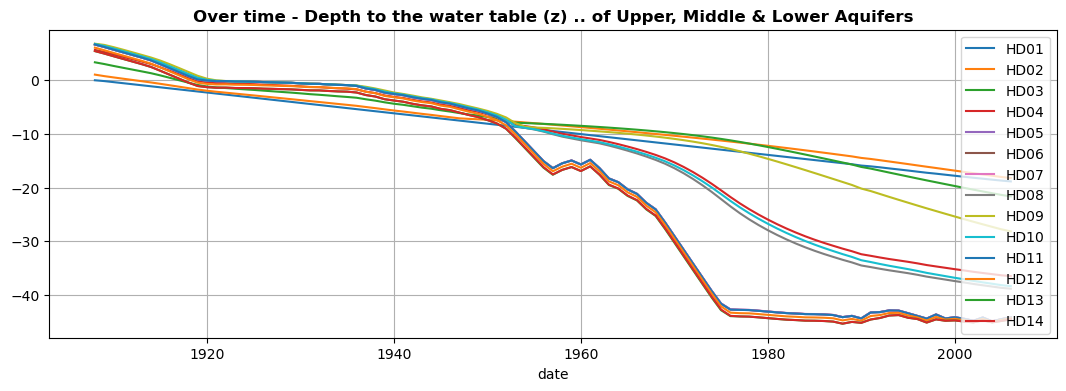

In [17]:
def process_sim_csv(absent, index_tag="time", origin_str="1908-05-09 00:00:00.000000", **kwargs):
    vv = pd.read_csv(absent, **kwargs)       ; vv["date"] = pd.to_datetime(vv[index_tag].values, unit="d", origin=origin_str)
    vv.set_index("date", inplace=True)     ; vv.drop(columns=index_tag, inplace=True)         ; col_list = list(vv.columns)
    return vv, col_list     #Flow = pd.read_csv(pth1)   ; Flow = pd.to_datetime(Flow["time"].values, unit="d", origin="1908-05-09 00:00:00.000000")

name = list(parameters.keys())[1]                                                   ; pth1   = os.path.join(workspace, name, f"{name}.gwf.obs.csv")
df_heads, col_list = process_sim_csv(pth1, origin_str="1908-05-09 00:00:00.000000")  ; df_heads_year = df_heads.groupby(df_heads.index.year).mean()
df_heads_year.to_csv (workspace / '03_heads_year.csv')                                                        # groupby(df_heads.index.year).mean()

fig, ax = plt.subplots(nrows=1, ncols=1)        ; df_heads_year.plot(ax=ax,use_index=True, y=list(df_heads_year)                  , figsize=(13,4))     
ax.set_title("Over time - Depth to the water table (z) .. of Upper, Middle & Lower Aquifers", fontweight='bold')          ; plt.grid() ; plt.show() 
#fig, _ = df.plot(kind='line', subplots=True, figsize=(8, 4)) #; plt.show() 

<font color='red'> **02a_CSUB_MOD** </font> 

earlier legend ['time', 'CUNIT1', 'CUNIT2', 'CUNIT3', 'AQUITARD6', 'AQUITARD7', 'AQUITARD8', 'NODELAY4', 'NODELAY5', 'NODELAY9', 'NODELAY10', 'DELAY11', 'DELAY12', 'DELAY13', 'ES14', 'TC02', 'SKC02', 'TC03', 'SKC03', 'TC04', 'SKC04', 'TC05', 'SKC05', 'TC07', 'SKC07', 'TC08', 'SKC08', 'TC09', 'SKC09', 'TC10', 'SKC10', 'TC12', 'SKC12', 'TC14', 'SKC14']


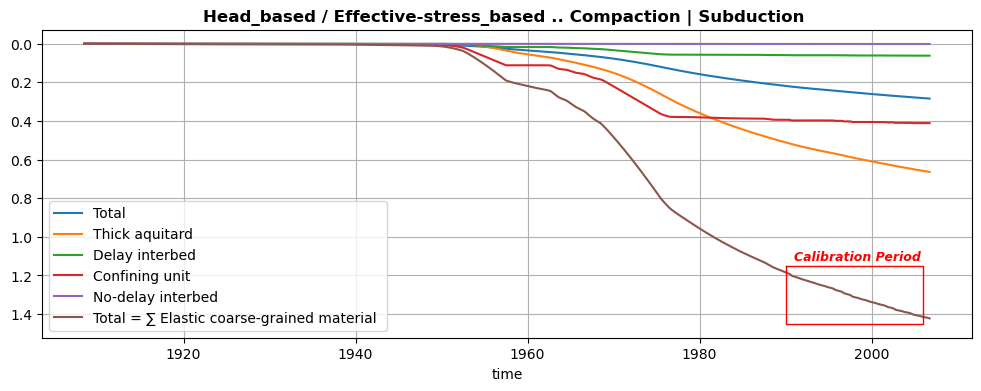

In [10]:
name = list(parameters.keys())[0]  ; pth2 = os.path.join(workspace, name, f"{name}.csub.obs.csv")   ; de=pd.read_csv(pth2)  
de.to_csv (workspace / '04_hb_csub_a.csv')                ; print('earlier legend', list(de.columns.values))   
d1=de.filter(like='CUN',axis=1).sum(axis=1)               ; d2=de.filter(like='AQU',axis=1).sum(axis=1);
d3=de.filter(like='NOD',axis=1).sum(axis=1)               ; d4=de.filter(like='DEL',axis=1).sum(axis=1);
d5=de.filter(like='SKC',axis=1).sum(axis=1)             # ; d6=de.filter(like='TC ',axis=1).sum(axis=1); 
d5=de.filter(like='SKC',axis=1).iloc[:, [3]].sum(axis=1)  ;d6 = pd.concat([d1[:],d2[:],d3[:],d4[:],d5[:]],axis=1).sum(axis=1) 

Tyears = de.iloc[:, 0] ; Tyears = (Tyears/365) + 1908.353182752                                 ; d0 = pd.DataFrame(Tyears) 
df2 = pd.concat([d0[:],d1[:],d2[:],d3[:],d4[:],d5[:],d6[:]],axis=1)                             ; df2.set_index('time', inplace=True, drop=True) 
pcomp     =["TOTAL" ,"AQUITARD"       ,"DELAY"          ,"CUNIT"          ,"NODELAY"            ,"SKELETAL"]  
df2.columns=["Total ","Thick aquitard ","Delay interbed ","Confining unit ","No-delay interbed ","Total = ∑ Elastic coarse-grained material "]  

fig, ax = plt.subplots(nrows=1, ncols=1)                ; df2.plot(ax=ax,use_index=True, y=list(df2) ,figsize=(12,4))     
ax.set_title("Head_based / Effective-stress_based .. Compaction | Subduction ",fontweight='bold')                              ; ax.invert_yaxis()
xa=1990; xB=2006 ; ya=1.15; yB=1.45 ; ix=(xa,xa,xB,xB,xa)               ; iy=(ya,yB,yB ,ya,ya)  ; ax.plot(ix, iy, lw=1.0, color="red", zorder=200)   
styles.add_text(ax=ax, text="Calibration Period",x=xB-15,y=1.14,color='red',  transform=False)  ; plt.grid() ; plt.show() 

<font color='red'> **02b_CSUB_MOD** </font> <font color='blue'> **x MED** </font> 

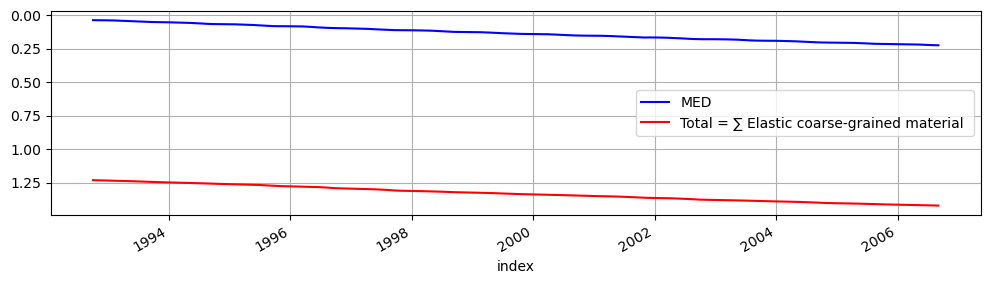

In [18]:
df3 = df2[df2.columns[-1]]; df3 = pd.DataFrame(df3)    ; df3.reset_index(level=0, inplace=True)  ; df3.to_csv(workspace/'08_MOD_A.csv')    
MOD = pd.read_csv(pth2)  ; MODt = pd.to_datetime(MOD["time"].values, unit="d", origin="1908-05-09")         ; tdata=pd.DataFrame(MODt, columns=['index']) 
df4 = pd.concat([tdata[:],df3[:]],axis=1).drop('time', axis=1)                ; df4 = df4[(df4['index'] > '1992-10-01') & (df4['index'] <= '2006-09-04')] 
df4.set_index("index", inplace=True)                      # df4 x dg ...

fpath_dg = os.path.join(path,'008N010W01Q005S_obs.csv')   # 008N010W01Q005S_1D.csv      
dg = pd.read_csv(fpath_dg, index_col=0)                                 ; dg.index = pd.to_datetime(dg.index.values, format="%m/%d/%y") 
dg.rename({"mean": "MED"}, inplace=True, axis=1)                   ; dg.reset_index(level=0, inplace=True) ; 
dg = dg[(dg['index'] > '1992-10-01') & (dg['index'] <= '2006-09-04')]   ; dg.set_index("index", inplace=True)
dg.to_csv(workspace/'07_MED_dg.csv')                                  # ; print(dg.head(1), dg.tail(1))  #; print(dh.head(1), dh.tail(1))

fig,ax=plt.subplots(1,1,figsize=(12,3)) ;ax=dg.plot(ax=ax,color='blue') ;_=df4.plot(ax=ax,color='red',grid=True) ; ax.invert_yaxis() ; plt.show()